In linear regression we predicted a continuous variable, while in classification, we will try to correctly classify or predict a target class for the target variable. 
Finding weather a email is spam or not, or determining if the given picture is of a dog , a cat or a horse are all classification problems.   
When there are only two categories for a classification, it's called as a binary classification. When there are multiple categories, the problem is referred to as multi-class classification.   

#### Binary Classification

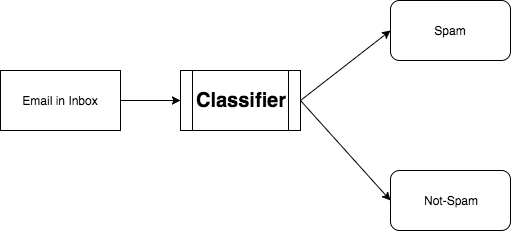

#### Multiclass classification

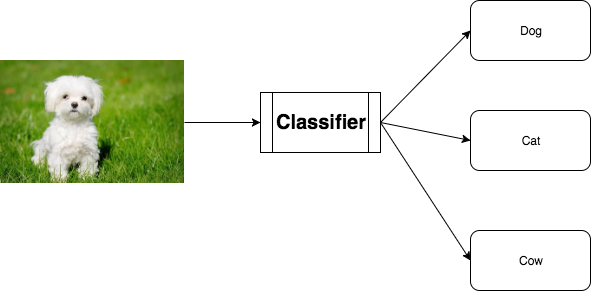

Types of classifiers:  
Linear  
Logistic  
Decision Trees  
Ensemble  

#### Linear Classifiers

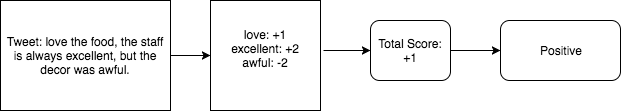

The parameters in linear classifier is the weights associated with words (which are features in this case). So the end goal is to learn the paramters that would help us tie a stream of words to a probablity. 

Suppose we have figured out the weights (parameters). Then we will break a tweet into words and calculate the total score of sentiments. If the sum is greater than 1, then it's a positive review else negative.  
This is called as **linear** classifier because the output is the weighted sum of the inputs.

##### Decision Boundaries:

Decision boundaries are hypersurfaces that seperate the categoris in a classification. In above example, if there are only two words aweful and awesome, when there are more awesome and aweful's, the reviews are positive ,otherwise negative. Hence, the decision boundry will be the line  n1* #awesome - n2* #awful = 0 , where n1 is number of awesome and n2 is number of awful in a tweet. 

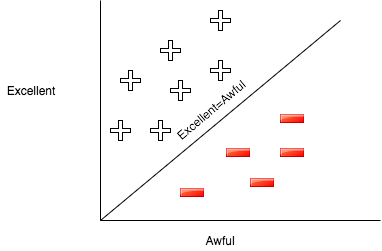

When there are two or more words involved, the line becomes a plane, and when there are more than two words involved, the general terms is called as a hyperplane.
Note that linear classifiers can only have straight lines/planes/hyperplanes as decision boundaries.

Model:
$$ y_i = Sign(Score(x_i)) $$
$$   Score(x_i) = w_0+w_1*h(x_1)+w_2*h(x_2)+...+w_n*h(x_n)$$
$$ Score(x_i) = W^T*h(x_i)$$
$$ y_i = Sign(W^T*h(x_i)) $$
Where h can be a constant, like 2 , or a log function or a tf-idf function etc.


Now let's move away from having a constant value of score to classify positive or negative sentiment and think about using probablity that a sentiment is positive or negative. As probablity can only be between 0 and 1, we need a way to map the scores to the probablity range. The function which does that is called a link function (g).
$$  Score(xi) = g(W^T∗h(xi)) $$

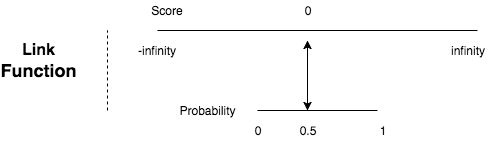

##### Logistic Regression

Logistic regression is a special case of above model which uses a logistic function (sigmoid,logit) as  the link function. A Logistic function is defined as :  
$$ sigmoid(score) = \frac {1}{1+ e^{-score}} $$

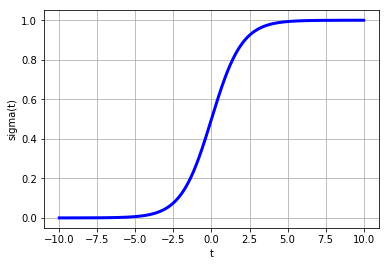

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.seterr(over='ignore')
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

X_vals = np.linspace(-10, 10, 1000)
plt.plot(X_vals, sigmoid(X_vals), color='blue', linewidth=3)
plt.ylabel('sigma(t)')
plt.xlabel('t')
plt.grid(True)
plt.show()

In [2]:
print("sigmoid(0):",sigmoid(0))
print("sigmoid(1):",sigmoid(1))
print("sigmoid(5):",sigmoid(5))
print("sigmoid(-5):",sigmoid(-5))
print("sigmoid(10000000):",sigmoid(10000000))
print("sigmoid(-1000000):",sigmoid(-1000000))

sigmoid(0): 0.5
sigmoid(1): 0.73105857863
sigmoid(5): 0.993307149076
sigmoid(-5): 0.00669285092428
sigmoid(10000000): 1.0
sigmoid(-1000000): 0.0


So the logistic regression model can be expresses formally as:1*  
$$  P(y=+1|x_i,w) = sigmoid(Score(x_i))  $$
$$  = \frac{1}{1+e^{-Score(x_i)}}  $$
$$  = \frac{1}{1+e^{-(w_0h_0(x_0)+w_1h_1(x_1)+...+w_nh_n(x_n))}}  $$

Let's apply the logistic model to the same tweet we used before. The score of the tweet was +1, hence   
$$  P(y=+1|x_i,w) = sigmoid(1) $$
$$ = 0.73105857863 $$

#### Effect of bais  and weights to the sigmoid function:  
The bias term in the model shifts the sigmoid curve to the left or right depending on the sign. Also we can observe that the higher the weights of the features are, the more steep the sigmoid curve is.  

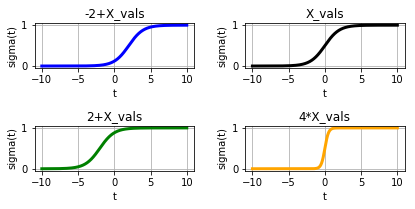

In [3]:
plt.subplot(321)
plt.plot(X_vals, sigmoid(-2+X_vals), color='blue', linewidth=3)
plt.ylabel('sigma(t)')
plt.xlabel('t')
plt.title('-2+X_vals')
plt.grid(True)

plt.subplot(322)
plt.plot(X_vals, sigmoid(X_vals), color='black', linewidth=3)
plt.ylabel('sigma(t)')
plt.xlabel('t')
plt.title('X_vals')
plt.grid(True)

plt.subplot(323)
plt.plot(X_vals, sigmoid(2+X_vals), color='green', linewidth=3)
plt.xlabel('t')
plt.ylabel('sigma(t)')
plt.title('2+X_vals')
plt.grid(True)

plt.subplot(324)
plt.plot(X_vals, sigmoid(4*X_vals), color='orange', linewidth=3)
plt.xlabel('t')
plt.ylabel('sigma(t)')
plt.title('4*X_vals')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Model Flow:

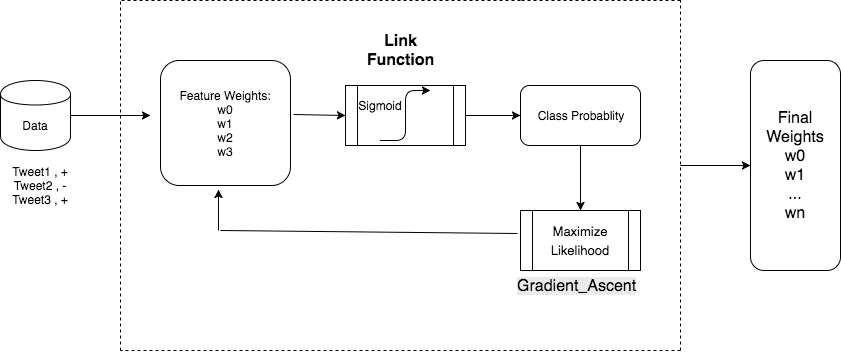

In order to measure the effectiveness of weights, in linear regression model, we had used the root mean square error score. In Logistic regression, we use a different metric called likelihood function. However while we had tries to minimize the RMSE using gradient descent to find the best fitting line , here we will try to maximize the likelihood function using gradient ascent.

Likelihood can be thought of as a synonym for probablity. Assuming all the input data points are independent, the  likelihood is thus defined the product of probablities for each input data.
$$ l(w) = P(y_1|x_1,w)*P(y_2|x_2,w)*....P(y_n|x_n,w)$$
$$   =   \prod_{i=1}^{N} P(y_i|x_i,w) $$

Algorithm for performing logistic regression:  
1) Initialize the weights  
2) Repeat until the log_likelihood converges:  
   For every feature, calculate the partial derivative as:
      $$ partial[j] = \Sigma_{i=1}^{N} h_j(x_i) (y_i-P(y=+1|x_i,w)) $$
      P(y=+1|x_i,w) is the logistic function **(1)**
      Update the weights as  
      $$ w_j(t+1) = w_j(t)+\alpha \ partial[j] $$
   Here aplha is the hyper-parameter called learning rate.

In [4]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [5]:
def logistic_regression(features, target, num_steps, learning_rate):
    weights = np.zeros(features.shape[1])
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient[0][0]
        if step % 1000 == 0:
            print(log_likelihood(features, target, weights))
    return weights

In [10]:
np.random.seed(12)
num_observations = 25

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([0, 4], [[1, .75],[.75, 1]], num_observations)

X_raw = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))
X = np.array(X_raw[:, 0]).reshape(2*num_observations,1)
y = np.array(X_raw[:, 1]).reshape(2*num_observations,1)

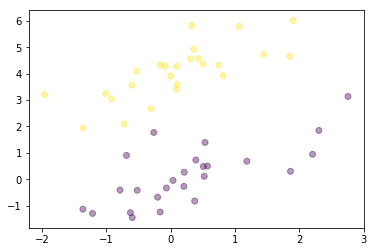

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(X_raw[:, 0], X_raw[:, 1],
            c = labels, alpha = .4)

In [14]:
logistic_regression(X,y,10000,0.0005)

-1715.82624976
-4332.44631568
-8659.12403945
-13017.8210038
-17382.322947
-21748.4623692
-26115.2038448
-30482.2181709
-34849.3864815
-39216.6626451


array([ 246.91220125])